# Dimensionality reduction of handwritten digits dataset

### I followed this site to download data as CSV: http://rasbt.github.io/mlxtend/user_guide/data/loadlocal_mnist/
### the mnist data was downloaded locally from http://yann.lecun.com/exdb/mnist/. 

### Only train-images-idx3-ubyte.gz and  train-labels-idx1-ubyte.gzset were used in this practice.


In [18]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

image_data = pd.read_csv("images.csv")
print(image_data.shape)
print(image_data.head(5))

label_data = pd.read_csv("labels.csv")
print(label_data.shape)
print(label_data.head(5))


(59999, 784)
   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...    0.608  0.609  0.610  \
0  0    0    0    0    0    0    0    0    0    0  ...        0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...        0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...        0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...        0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...        0      0      0   

   0.611  0.612  0.613  0.614  0.615  0.616  0.617  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 784 columns]
(59999, 1)
   5
0  0
1  4
2  1
3  9
4  2


In [22]:
X, y = image_data.iloc[:, :].values, label_data.iloc[:,:].values

print(len(X),len(y))

59999 59999


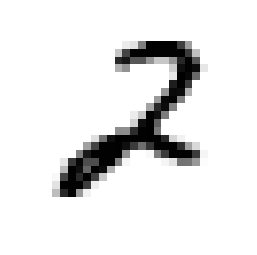

In [66]:
#Here is a digit being plot from the MNIST data set
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

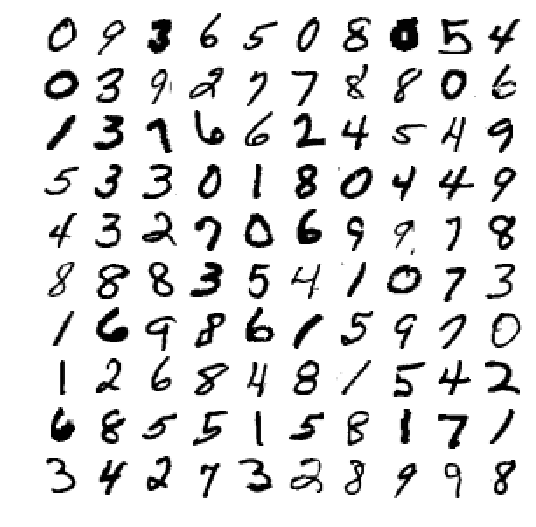

In [67]:
#Plot a digit from the dataset
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
# Plot the digits
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
      
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

Exercise: Okay, now we have read in the dataset and show what it contains.
Now split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [35]:
#Load X_train, y_train, X_test, and y_test.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

print(len(X_train),len(X_test))
print(len(y_train),len(y_test))


41999 18000
41999 18000


Train a logistic regression classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. You will need to use "import time". Use random state = 42 when training your model and use multi_class="multinomial". Note, the lbfgs solver will fail to converge, but just ignore it.

In [36]:
#train logistic regression model
from sklearn.linear_model import LogisticRegression
import time

# C is regularization, if not linearly separable, you can tune a decision boundary
lr = LogisticRegression(C=100, random_state=42, solver='lbfgs', multi_class='multinomial')
start_time = time.time()
lr.fit(X_train, y_train)
training_time = time.time() - start_time

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
#Print out how long the model training took
print("training time: %s seconds" % (training_time))

training time: 9.733143091201782 seconds


In [42]:
#Make a prediction on the test set and give the accuracy score
from sklearn.metrics import accuracy_score

# Check the results using metrics
from sklearn import metrics
y_pred = lr.predict(X_test)
print("confusion_matrix: \n{}".format(metrics.confusion_matrix(y_test, y_pred)))
metrics.confusion_matrix(y_pred, y_test).tolist()[0][0]

from sklearn.metrics import classification_report
print("\nclassification_report:\n {}".format(classification_report(y_test, y_pred)))

confusion_matrix: 
[[1709    0    5    6    5   11   16    5   17    3]
 [   0 1977    7    4    1    6    2    4   17    5]
 [   9   14 1597   34   18    8   23   20   56    8]
 [  12    6   43 1624    2   68   10   17   39   18]
 [   8   11   11    1 1620    3    9    7   17   66]
 [  18    6   10   67   13 1401   26   10   53   22]
 [  12    3   24    2   11   22 1683    3   12    3]
 [  11    7   17    8   12    0    1 1760    6   58]
 [   4   36   21   46    4   66   11    8 1544   15]
 [   9    5    1   19   53   10    0   42   16 1630]]

classification_report:
              precision    recall  f1-score   support

          0       0.95      0.96      0.96      1777
          1       0.96      0.98      0.97      2023
          2       0.92      0.89      0.91      1787
          3       0.90      0.88      0.89      1839
          4       0.93      0.92      0.93      1753
          5       0.88      0.86      0.87      1626
          6       0.94      0.95      0.95      1775


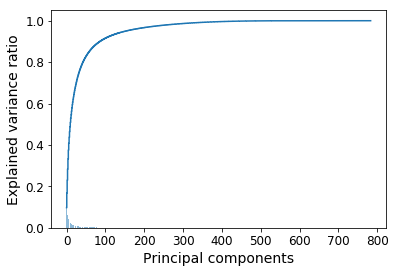

sum_of the first 154th biggest eigenvalue features: 0.9502683585308013


In [56]:
#Use PCA to reduce the the dimensionality of the features while keeping 95% of the explained variance.
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

plt.bar(range(0,784), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(0,784), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

# print(pca.explained_variance_ratio_.sum())
sum_variance_ratio = 0
for i, el in enumerate(pca.explained_variance_ratio_):
    if sum_variance_ratio < 0.95:
        sum_variance_ratio += el
        continue
    else:
        print("sum_of the first {}th biggest eigenvalue features: {}".format(i, sum_variance_ratio))
        break

In [60]:
pca_reduced = PCA(n_components=154)
X_train_pca_reduced = pca_reduced.fit_transform(X_train)
X_test_pca_reduced = pca_reduced.transform(X_test)

In [61]:
#Retrain regression model on reduced dataset
lr_reduced = LogisticRegression(C=100, random_state=42, solver='lbfgs', multi_class='multinomial')
start_time = time.time()
lr.fit(X_train_pca_reduced, y_train)
training_time = time.time() - start_time

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
#print out how long training took on reduced dataset
print("training time: %s seconds" % (training_time))

training time: 3.338444948196411 seconds


In [63]:
#give prediction with logistic regression model based on reduced feature set. 
#Comment on the accuracy and speed difference between using the full feature set and the reduced feature space.
#Make a prediction on the test set and give the accuracy score
# Check the results using metrics

y_pred_reduced = lr.predict(X_test_pca_reduced)
print("confusion_matrix: \n{}".format(metrics.confusion_matrix(y_test, y_pred_reduced)))
metrics.confusion_matrix(y_pred_reduced, y_test).tolist()[0][0]

print("\nclassification_report:\n {}".format(classification_report(y_test, y_pred_reduced)))

confusion_matrix: 
[[1715    0    2    3    5   21   14    4   10    3]
 [   0 1965    7    5    0    7    1    6   27    5]
 [  19   14 1596   28   19    4   25   26   49    7]
 [  15   11   40 1632    2   56   16   20   29   18]
 [   9   15   11    1 1628    1   10    4   14   60]
 [  22   18   17   64   17 1382   31   12   41   22]
 [  13    6   17    0   12   19 1693    4    8    3]
 [   8   12   14    4   16    1    2 1773    3   47]
 [   5   65   22   45   11   54   13    9 1507   24]
 [  11    4    1   19   58    8    0   44    9 1631]]

classification_report:
              precision    recall  f1-score   support

          0       0.94      0.97      0.95      1777
          1       0.93      0.97      0.95      2023
          2       0.92      0.89      0.91      1787
          3       0.91      0.89      0.90      1839
          4       0.92      0.93      0.92      1753
          5       0.89      0.85      0.87      1626
          6       0.94      0.95      0.95      1775
